In [ ]:
# Intro

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt

Folium installed
Libraries imported.


In [7]:
# Make two dataframes and merge them to add average age and drop unecessary columns

data = pd.read_html("https://en.wikipedia.org/wiki/List_of_municipalities_of_Sweden")
df=data[1]


In [16]:
df.drop(['Inland water area (km2)', 'Seawater area (km2)', 'Total area (km2)', 'Municipality', 'Nr'], axis=1, index=None, columns=None, level=None, inplace=True, errors='ignore')

!wget -q -O 'SE_age_municipality_edited.csv' https://raw.githubusercontent.com/neilrmackin/Coursera-_Capstone/master/SE_age_municipality_edited.csv
df_ages = pd.read_csv('SE_age_municipality_edited.csv')

df_merge = pd.merge(df, df_ages, on='Code')




In [20]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


df_merge

,Code,Seat,County,Population,Land area (km2),Density (people/km2),Municipality,Average_age
0,1440,Nödinge-Nol,Västra Götaland County,27947,316.51,88.30,Ale,39.4
1,1489,Alingsås,Västra Götaland County,38553,472.03,81.67,Alingsas,42.2
2,764,Alvesta,Kronoberg County,19219,974.19,19.73,Alvesta,41.8
3,604,Aneby,Jönköping County,6360,517.76,12.28,Aneby,42.5
4,1984,Arboga,Västmanland County,13437,325.43,41.29,Arboga,44.6
5,2506,Arjeplog,Norrbotten County,2996,12556.77,0.24,Arjeplog,47.2
6,2505,Arvidsjaur,Norrbotten County,6454,5655.97,1.14,Arvidsjaur,45.7
7,1784,Arvika,Värmland County,25835,1649.06,15.67,Arvika,44.8
8,1882,Askersund,Örebro County,10993,815.99,13.47,Askersund,46.3
9,2084,Avesta,Dalarna County,21549,613.25,35.14,Avesta,44.0


In [ ]:
from geopy.exc import GeocoderTimedOut 

In [1466]:
# Individual city coordinates
address = 'Övertorneå, Sweden'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

66.51355335 23.43209270748485


In [ ]:
# add latitude and longitude of municipality seats to table df_merge_col
# function to find the coordinate of a given city  

longitude = [] 
latitude = [] 
def findGeocode(city):      
    try:  
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="foursquare_agent") 
          
        return geolocator.geocode(city)  
    except GeocoderTimedOut:    
        return findGeocode(city) 

# each value from city column will be fetched and sent to function find_geocode    
for i in (df_merge_col["Seat"]):   
    if findGeocode(i) != None:    
        loc = findGeocode(i) 
          
        # coordinates returned from function is stored into two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not found, insert "NaN"  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)
        
# now add this column to dataframe 
df_merge_col["Longitude"] = longitude 
df_merge_col["Latitude"] = latitude 
df_merge_col.head() 

In [1467]:
# For pharmacy location data, set Foursquare access details

CLIENT_ID = 'V04KOCNRBTU1RTELZ24JKXDJLSRN4QXCS30BRDK0R2LJMGMH' #  Foursquare ID
CLIENT_SECRET = 'UCCZMNLAWTT2KDJORWDKGNN1UGZ5QWF1OIPOEFWGU3RCXHRH' # Foursquare Secret
VERSION = '20180604'
LIMIT = 50

search_query = 'apotek'
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V04KOCNRBTU1RTELZ24JKXDJLSRN4QXCS30BRDK0R2LJMGMH&client_secret=UCCZMNLAWTT2KDJORWDKGNN1UGZ5QWF1OIPOEFWGU3RCXHRH&ll=66.51355335,23.43209270748485&v=20180604&query=apotek&radius=10000&limit=50'

In [1468]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f21c1674d24b71550740fe6'},
 'response': {'venues': []}}

In [1469]:
# assign relevant part of JSON to venues
locations = results['response']['venues']

# tranform venues into a dataframe
apotek = json_normalize(locations)

apotek.shape

(0, 0)

In [1472]:
# import new csv with all data; add pharmacies per capita to column
!wget -q -O 'Apotek_SE_count.csv' https://raw.githubusercontent.com/neilrmackin/Coursera-_Capstone/master/Apotek_SE_count.csv
df_pharma = pd.read_csv('Apotek_SE_count.csv')

df_pharma.head()

,Code,Seat,County,Population,Land area (km2),Density (people/km2),Municipality,Average_age,Latitude,Longitude,pharmacy_count
0,1440,Nödinge-Nol,Västra Götaland County,27947,316.51,88.30,Ale,39.4,57.906877,12.060161,3
1,1489,Alingsås,Västra Götaland County,38553,472.03,81.67,Alingsas,42.2,57.929966,12.532968,3
2,764,Alvesta,Kronoberg County,19219,974.19,19.73,Alvesta,41.8,56.848368,14.440834,1
3,604,Aneby,Jönköping County,6360,517.76,12.28,Aneby,42.5,57.858122,14.817813,1
4,1984,Arboga,Västmanland County,13437,325.43,41.29,Arboga,44.6,59.394187,15.839664,1


In [ ]:
# scatter plot showing population against number of pharmacies to see if there is a trend
# scatter plot showing pharmacies per capita against average age to see if there is a trend
# k means testing to break up groups of municipalities

In [1471]:
import matplotlib.pyplot as plt # plotting library
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

In [1475]:
address = "Sundsvall, Sweden"
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [1484]:
# create map of Sweden using latitude and longitude values
f = folium.Figure(width=800, height=1200)
map_sweden = folium.Map(location=[latitude, longitude], zoom_start=5).add_to(f)


# add markers to map
for lat, lng in zip(df_pharma['Latitude'], df_pharma['Longitude']):
    label = '{}, {}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sweden) 
    
map_sweden

In [1489]:
x1 = df_pharma['Population']
x2 = df_pharma['pharmacy_count']

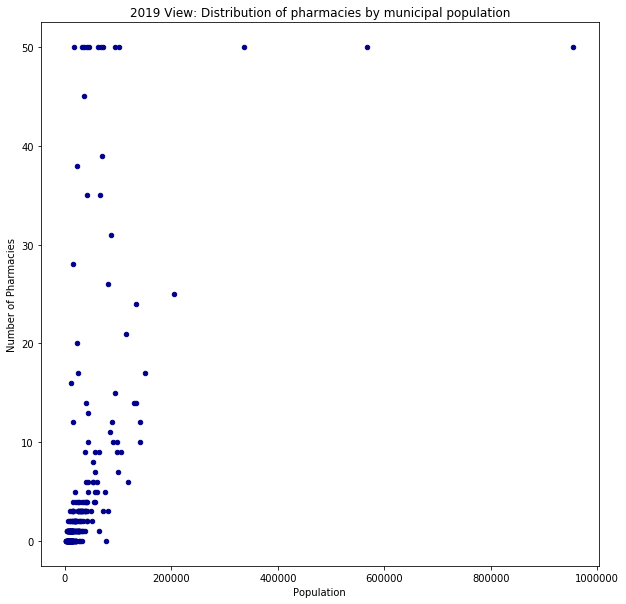

In [1522]:
df_pharma.plot(kind='scatter', x='Population', y='pharmacy_count', figsize=(10, 10), color='darkblue')

plt.title('2019 View: Distribution of pharmacies by municipal population')
plt.xlabel('Population')
plt.ylabel('Number of Pharmacies')

plt.show()


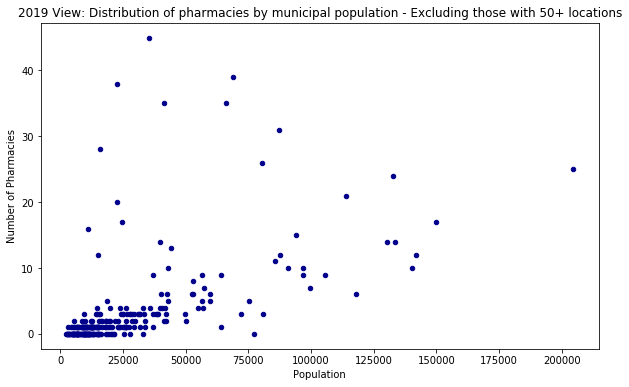

In [1498]:
df_adjust = df_pharma[df_pharma.pharmacy_count != 50]

df_adjust.plot(kind='scatter', x='Population', y='pharmacy_count', figsize=(10, 6), color='darkblue')

plt.title('2019 View: Distribution of pharmacies by municipal population - Excluding those with 50+ locations')
plt.xlabel('Population')
plt.ylabel('Number of Pharmacies')

plt.show()

In [1514]:
x2 = df_adjust2['Population']      # year on x-axis
y2 = df_adjust2['pharmacy_count']     # total on y-axis
fits = np.polyfit(x2, y2, deg=1)

fits

array([1.19862025e-04, 1.05546217e+00])

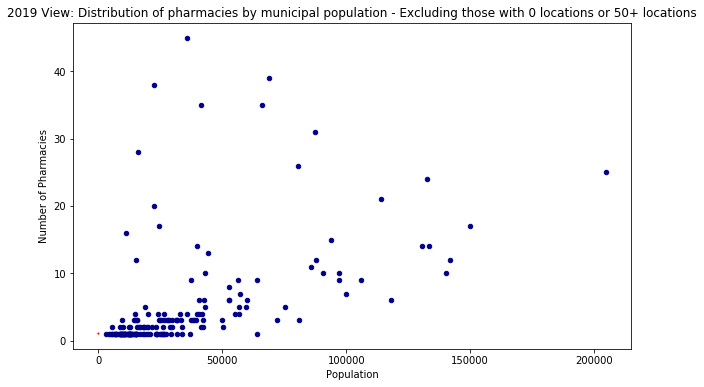

In [1517]:
df_adjust2 = df_adjust[df_adjust.pharmacy_count != 0]

df_adjust2.plot(kind='scatter', x='Population', y='pharmacy_count', figsize=(10, 6), color='darkblue')

plt.title('2019 View: Distribution of pharmacies by municipal population - Excluding those with 0 locations or 50+ locations')
plt.xlabel('Population')
plt.ylabel('Number of Pharmacies')
plt.plot(x, fits[0] * x + fits[1], color='red')

plt.show()

In [1500]:
df_adjust2.shape

(181, 11)

In [1502]:
x = df_adjust2['Average_age']      # year on x-axis
y = df_adjust2['pharmacy_count']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-1.66934175, 76.81365607])

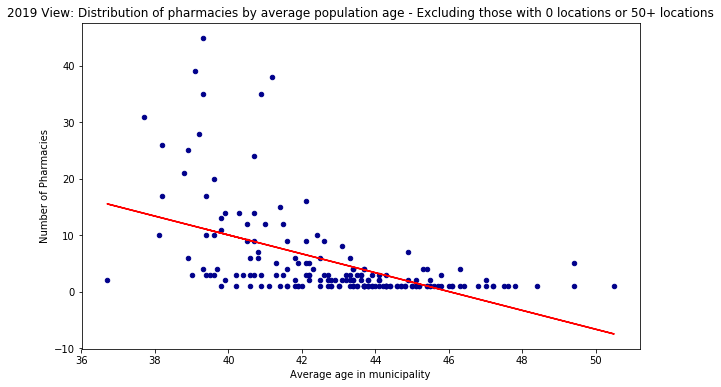

In [1506]:
df_adjust2.plot(kind='scatter', x='Average_age', y='pharmacy_count', figsize=(10, 6), color='darkblue')

plt.title('2019 View: Distribution of pharmacies by average population age - Excluding those with 0 locations or 50+ locations')
plt.xlabel('Average age in municipality')
plt.ylabel('Number of Pharmacies')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show()


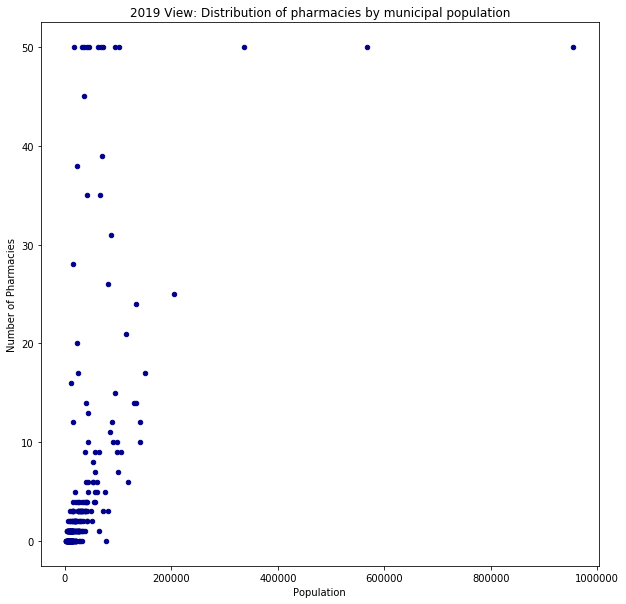

In [1523]:
df_pharma.plot(kind='scatter', x='Population', y='pharmacy_count', figsize=(10, 10), color='darkblue')

plt.title('2019 View: Distribution of pharmacies by municipal population')
plt.xlabel('Population')
plt.ylabel('Number of Pharmacies')

plt.show()